**Modelo Linear para tentar prever o consumo de um carro**

mpg: milhas por galão (medida de consumo dos EUA, como km/L), nossa variável alvo
cylinders: número de cinlindros do motor
displacement: deslocamento do motor, em polegadas cúbicas
horsepower: potência do carro, em HP
weight: peso do carro, em libras
acceleration: tempo, em segundos, para acelerar de 0 a 60 mph (milhas por hora)
model year: ano de fabricação do carro
origin: região da origem do carro (1 - Americano / 2 - Europeu / 3 - Asiático)
car name: nome do carro

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
dataset = '/workspaces/2025-2-minf-0701-projeto-ReverieJacket/dataset/Carros - Página1.csv'

cdata = pd.read_csv(dataset)
cdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,115,70,1,buick skylark 320
2,18,8,318,150,3436,11,70,1,plymouth satellite
3,16,8,304,150,3433,12,70,1,amc rebel sst
4,17,8,302,140,3449,105,70,1,ford torino


Tratamento de dados

In [7]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           392 non-null    int64 
 1   cylinders     392 non-null    int64 
 2   displacement  392 non-null    int64 
 3   horsepower    392 non-null    int64 
 4   weight        392 non-null    int64 
 5   acceleration  392 non-null    int64 
 6   model year    392 non-null    int64 
 7   origin        392 non-null    int64 
 8   car name      392 non-null    object
dtypes: int64(8), object(1)
memory usage: 27.7+ KB


Divisão de dados

In [8]:
def standardize_data(X):
    # 1. Calcule a média de cada coluna
    mean_by_column = np.mean(X, axis=0)
    
    # 2. Calcule o desvio padrão de cada coluna
    std_by_column = np.std(X, axis=0)

    # 3. Evite a divisão por zero em colunas com desvio padrão zero
    # Substitua desvios padrão zero por 1 para evitar problemas
    # A transformação (x - mean) / 1 resultará em (x - mean), que será 0,
    # já que x e mean são iguais quando o desvio padrão é zero.
    std_by_column[std_by_column == 0] = 1

    # 4. Padronize os dados aplicando a fórmula
    X_scaled = (X - mean_by_column) / std_by_column

    return X_scaled, mean_by_column, std_by_column

In [9]:
cd = cdata.drop(['car name', "origin"], axis=1)

cd, _, _ = standardize_data(cd)

# Variáveis independentes (características)
X = cd.drop(['mpg'], axis=1)

# Variável dependente (alvo)
y = cd['mpg']

In [10]:
'''
# Adiciona a constante
X_np = X.values

# 2. Adicione uma coluna de 1s (a constante) na primeira posição (índice 0)
X_com_constante = np.insert(X_np, 0, 1, axis=1)

# converter o resultado de volta para um DataFrame
# para manter a estrutura e os nomes das colunas
colunas = ['constante'] + list(X.columns)
X = pd.DataFrame(X_com_constante, columns=colunas)

# Veja como ficou o novo DataFrame X
X.head()

'''

"\n# Adiciona a constante\nX_np = X.values\n\n# 2. Adicione uma coluna de 1s (a constante) na primeira posição (índice 0)\nX_com_constante = np.insert(X_np, 0, 1, axis=1)\n\n# converter o resultado de volta para um DataFrame\n# para manter a estrutura e os nomes das colunas\ncolunas = ['constante'] + list(X.columns)\nX = pd.DataFrame(X_com_constante, columns=colunas)\n\n# Veja como ficou o novo DataFrame X\nX.head()\n\n"

In [11]:
y.head()

0   -0.709004
1   -0.733061
2   -0.709004
3   -0.725042
4   -0.717023
Name: mpg, dtype: float64

---------------------------------------------------------------------------------------------------

**Normalização**

In [12]:
data = pd.concat([X, y], axis=1)

# 2. Embaralhe (randomize) a ordem das linhas
data_shuffled = data.sample(frac=1, random_state=1).reset_index(drop=True)

# 3. Calcule o tamanho dos conjuntos de treino e teste
test_size = 0.3
total_rows = len(data_shuffled)
train_split = int(total_rows * (1 - test_size))

# 4. Divida os dados embaralhados
train_data = data_shuffled.iloc[:train_split]
test_data = data_shuffled.iloc[train_split:]

# 5. Separe novamente as variáveis X e y
X_train = train_data.drop('mpg', axis=1)
y_train = train_data['mpg']

X_test = test_data.drop('mpg', axis=1)
y_test = test_data['mpg']

# Verifique o tamanho de cada conjunto para confirmar
print(f"Tamanho do conjunto de treino (X_train): {len(X_train)}")
print(f"Tamanho do conjunto de teste (X_test): {len(X_test)}")


Tamanho do conjunto de treino (X_train): 274
Tamanho do conjunto de teste (X_test): 118


In [13]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.864014,-0.687018,-0.194303,-0.555905,0.440436,-1.081695
1,-0.864014,-0.893167,-0.766593,-0.950804,-1.426609,-0.266263
2,-0.864014,-0.794574,-0.766593,-0.739798,0.773320,1.364599
3,-0.864014,-0.678055,0.195895,-0.129178,0.585168,-0.809884
4,-0.864014,-0.946944,-0.974698,-1.158273,0.686481,1.636410


In [14]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
274,1.483947,1.822619,1.626621,2.273222,0.150972,-0.809884
275,1.483947,0.567801,0.143869,1.275955,-1.383189,0.277358
276,-0.864014,-0.507758,-0.766593,-0.513468,-1.412135,-0.538074
277,1.483947,0.944246,0.638120,0.881056,0.281231,0.820978
278,-0.864014,-0.669092,-0.480448,-0.885969,0.729901,-1.081695


Treino de modelo Linear

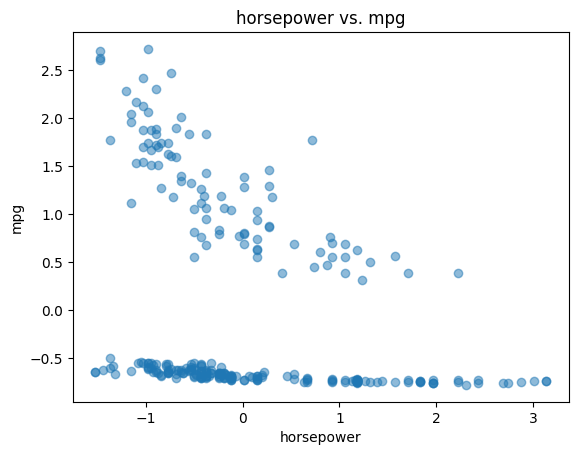

In [15]:
fig, ax = plt.subplots(1, 1)

plt.scatter(X_train['horsepower'], y_train, alpha=0.5)

# Adicionar rótulos e título
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('horsepower vs. mpg')

plt.show()

In [16]:
# Importe suas classes personalizadas
from src.optimizers import SteepestDescentMethod
from src.models import LinearModel
from src.algorithms import PLA 
from src.stop_criteria import MaxIterationStopCriteria

#critério de parada
learning_rate =  0.00001  #Lambida
max_iterations = 1000  

optimizer = SteepestDescentMethod(learning_rate=learning_rate)
model = LinearModel()
algoritmo = PLA(optimizer, model)
stop_criteria = MaxIterationStopCriteria(max_iteration=max_iterations)

X_Float = X_test.to_numpy(dtype=np.float64)
y_linha = y_test.values.reshape(-1,1) #transforma y em linha 

algoritmo.fit(X_Float, y_linha, stop_criteria)

final_weights = algoritmo.model.w
print("Pesos Finais:", final_weights)

Pesos Finais: [[ 0.00039689]
 [-0.00616906]
 [-0.00629624]
 [-0.00634343]
 [-0.00560888]
 [ 0.00640838]
 [ 0.01259706]]


In [17]:
from src.algorithms import PLA
from src.models import LinearModel
from src.optimizers import SteepestDescentMethod
from src.analyzers import PlotterAlgorithmObserver
from src.stop_criteria import CompositeStopCriteria, MaxIterationStopCriteria, MinErrorStopCriteria

In [18]:
def plot_strategy(optimizer, learning_rate):
    model = LinearModel()
    alg = PLA(optimizer, model)
    min_error = 0.75
    max_iteration = 10000

    stop_criteria = CompositeStopCriteria()
    stop_criteria.add(MinErrorStopCriteria(min_error=min_error))
    stop_criteria.add(MaxIterationStopCriteria(max_iteration=max_iteration))

    analyzer = PlotterAlgorithmObserver()
    alg.add(analyzer)

    y_linha = y_test.values.reshape(-1,1)
    alg.fit(X_test, y_linha, stop_criteria)

    final_iteration = max(analyzer.iterations)
    print(f"Final Iteration: {final_iteration}")
    print(f"Final Error: {analyzer.errors[-1]}")
    print(f"Final Weights: {analyzer.weights[-1]}")
    
    analyzer.plot(weights=alg.model.w)

Final Iteration: 1153
Final Error: [[0.7500102]]
Final Weights: [[ 0.00388778]
 [-0.04480347]
 [-0.04472541]
 [-0.04588134]
 [-0.03937538]
 [ 0.05439447]
 [ 0.12130874]]


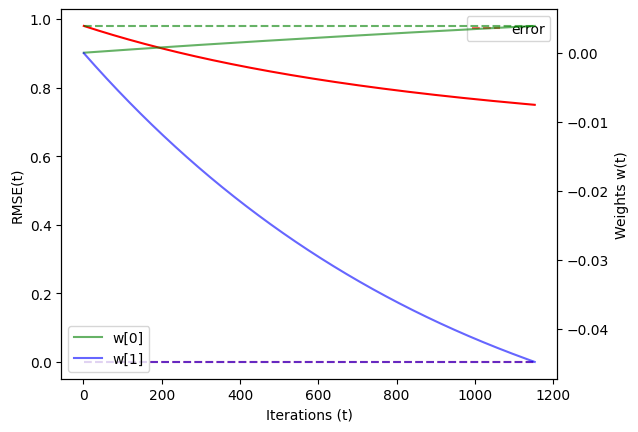

In [19]:
learning_rate = 0.0001
optimizer = SteepestDescentMethod(learning_rate)
plot_strategy(optimizer, learning_rate)